# 1st Assignment

### Skias Panagiotis 8160116

## Intro

* To begin with, I import the necessary libraries to use.
* Then I define the data type for each column of the data sheet.
* Finally I read the file and save it to a Data Frame named **flights**. 

**Valid flights are those that have not been canceled.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data_types = {
    'FL_DATE':str,
    'TAIL_NUM':str,
    'CARRIER':str, 
    'ORIGIN':str,                  
    'ORIGIN_CITY_NAME':str,        
    'DEST':str,                    
    'DEST_CITY_NAME':str,         
    'DEP_TIME':float,
    'DEP_DELAY':float,
    'ARR_TIME':float,
    'ARR_DELAY':float,
    'CANCELLED':float,
    'CANCELLATION_CODE':object,
    'DIVERTED':float,
    'CARRIER_DELAY':float,
    'WEATHER_DELAY':float,
    'NAS_DELAY':float,
    'SECURITY_DELAY':float,
    'LATE_AIRCRAFT_DELAY':float,
    'Unnamed: 19':float
}

parse_dates = ['FL_DATE']

data_filename = '515364771_T_ONTIME_REPORTING.csv'
flights = pd.read_csv(data_filename, dtype=data_types, parse_dates=parse_dates)

# Question 1

* I first clean the data, deleting the CANCELLED flights, and store it in a new Data Frame named **a_flights**.
* After that, I create a new DataFrame named **airport_flights**,  which shows the total number of Flights for each Origin.

In [2]:
#Cleaning data
#remove canceled flights
#a_flights all the not Cancelled flights
a_flights = flights[flights['CANCELLED'] == 0]

#we will make a data frame 
airport_flights = a_flights['ORIGIN'].value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS')

* From the DataFrame **airport_flights**, I take care the outliers, by removing the airports - origins in lowest 1% percentile in the number of flights.

In [3]:
#Take care for outliers
#The total number of flights from origins we want
airport_flights = airport_flights.loc[airport_flights.FLIGHTS >= airport_flights.FLIGHTS.quantile(0.01)] 

* From the above code, we notice that the airports we will remove are four.
* I compared the old **airport_flights** and the new **airport_flights**.
* The four airports with the least number of flights from the above criterion are:
    * CYS
    * IFP
    * ART
    * YNG
* I create a new DataFrame **b_flights**, which is similar to the **a_flights**, with the only difference, that we have removed the lines that include flights from the four airports above.

In [4]:
b_flights = a_flights.loc[(a_flights['ORIGIN'] != 'CYS') & (a_flights['ORIGIN'] != 'IFP') & (a_flights['ORIGIN'] != 'ART') 
                         & (a_flights['ORIGIN'] != 'YNG')]

* I am creating a new Data Frame named **del_flights** that includes flights that were not cancelled but were delayed.
* I also create a new Data Frame name **del_num_flights** with the number of delayed flights for each airport.

In [5]:
del_flights = b_flights.loc[b_flights['DEP_DELAY'].astype(float) > 0]
del_num_flights = del_flights['ORIGIN'].value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS')

* I sort the Data Frame **aiport_flights** and the Data Frame **del_num_flights** by the ORIGIN and FLIGHTS.
* I index the Data Frame **airport_flights** to the airport name.

In [6]:
airport_flights = airport_flights.sort_values(by=['ORIGIN', 'FLIGHTS'])
del_num_flights = del_num_flights.sort_values(by=['ORIGIN', 'FLIGHTS'])
airport_flights = airport_flights.set_index('ORIGIN')

* I index the Data Frame **del_num_flights** to the airport name.

In [7]:
del_num_flights = del_num_flights.set_index('ORIGIN')

* Based on the two Data Frames above, I create a new Data Frame named **misery_index**, which contains for each airport the number of total flights, the number of delayed flights and the percentage of delayed flights.

In [8]:
misery_index = pd.DataFrame(index=airport_flights.index)
misery_index ['DELAYED_FLIGHTS'] =  del_num_flights[['FLIGHTS']]
misery_index ['TOTAL_FLIGHTS'] = airport_flights[['FLIGHTS']]
misery_index.index.rename('AIRPORTS', inplace=True)

misery_index ['DELAY_PERCENTAGE'] = misery_index.DELAYED_FLIGHTS / misery_index.TOTAL_FLIGHTS

misery_index = misery_index.sort_values(by=['DELAY_PERCENTAGE'], ascending=False)

display(misery_index)

,DELAYED_FLIGHTS,TOTAL_FLIGHTS,DELAY_PERCENTAGE
AIRPORTS,,,
OGD,83,125,0.664000
SCK,486,741,0.655870
MDW,51123,85075,0.600917
HYA,52,88,0.590909
DAL,40530,69986,0.579116
HOU,31430,56963,0.551762
OWB,56,107,0.523364
HTS,423,843,0.501779
HGR,68,138,0.492754


* For every airport I find the average and the median.

In [9]:
c_flights = del_flights[['ORIGIN', 'DEP_DELAY']]
grouped = c_flights.groupby('ORIGIN')
grouped = grouped.agg(['mean', 'median'])

d_flights = grouped
d_flights.index.rename('AIRPORTS', inplace=True)

display(d_flights)

DEP_DELAY       
               mean median
AIRPORTS                  
ABE       52.704418   19.0
ABI       41.250417   18.0
ABQ       32.062658   14.0
ABR       63.883871   17.0
ABY       68.332168   22.0
ACK       76.642442   31.5
ACT       40.485714   17.0
ACV       63.697892   33.0
ACY       63.084772   20.0
ADK       38.069767   23.0
ADQ       26.125000   12.0
AEX       60.132695   25.0
AGS       48.310700   19.0
AKN       16.851852   15.0
ALB       38.587446   15.0
ALO       44.837209   21.5
AMA       42.112209   16.0
ANC       31.883994   12.0
APN       68.439024   14.0
ASE       74.029650   36.0
ATL       32.032415   14.0
ATW       53.914055   19.0
AUS       34.070844   14.0
AVL       55.776233   23.5
AVP       55.947429   21.0
AZA       37.712859   18.0
AZO       62.618147   31.0
BDL       39.211213   15.0
BET       25.165680   11.0
BFF       66.881579   27.0
...             ...    ...
STS       68.130435   29.0
STT       44.125323   19.0
STX       45.785507   20.0
SUN       67.754167   28.0
SUX       38.450734   18.0
SWF       62.101140   27.0
SWO       49.425532   26.0
SYR       55.445987   23.0
TLH       39.813772   15.0
TOL       45.916404   17.0
TPA       37.009002   16.0
TRI       55.283293   21.0
TTN       61.292191   31.0
TUL       38.455955   16.0
TUS       37.838620   16.0
TVC       58.045231   20.0
TWF       43.143541   21.0
TXK       46.738832   17.0
TYR       40.729114   16.0
TYS       55.460592   24.0
UIN       69.818182   30.0
USA       57.516393   24.0
VEL       61.894737   22.0
VLD       47.228000   14.5
VPS       40.094033   17.0
WRG       30.154412   17.0
WYS       15.233333    6.0
XNA       52.360057   23.0
YAK       28.740157   13.0
YUM       28.715415   12.0

[354 rows x 2 columns]

* I add columns DEP_DELAY mean and DEP_DELAY median to the **misery_index** Data Frame.
* Thus **missery_index** includes for each airport the probability, in descending order, that a passenger may face, as well as the average and median delay that a passenger may face. 

In [10]:
misery_index['DEP_DELAY mean'] = d_flights['DEP_DELAY']['mean']
misery_index['DEP_DELAY median'] = d_flights['DEP_DELAY']['median']

In [11]:
display(misery_index)
#End of the 1st Question

,DELAYED_FLIGHTS,TOTAL_FLIGHTS,DELAY_PERCENTAGE,DEP_DELAY mean,DEP_DELAY median
AIRPORTS,,,,,
OGD,83,125,0.664000,30.903614,14.0
SCK,486,741,0.655870,38.913580,21.0
MDW,51123,85075,0.600917,26.616122,14.0
HYA,52,88,0.590909,61.269231,15.0
DAL,40530,69986,0.579116,26.820429,13.0
HOU,31430,56963,0.551762,25.846102,13.0
OWB,56,107,0.523364,59.303571,25.0
HTS,423,843,0.501779,41.390071,19.0
HGR,68,138,0.492754,58.161765,26.5


# Question 2
* For start I read the data set which includes for each carrier, the abbreviation and the full-name and save it in a Data Frame **carriers**.

In [12]:
#Start of 2nd Question
data_filename_car = 'L_UNIQUE_CARRIERS.csv_'
carriers = pd.read_csv(data_filename_car)

* Because, I don't want to take care the outliers I create new Data Frames.
* Data Frame **all_del_flights** takes the flights from **a_flights** and  includes all delayed flights.

In [13]:
#all delayed flights
all_del_flights = a_flights.loc[a_flights['DEP_DELAY'] > 0]

* For the start I make the Data Frame **total_flights** that contains the total number of flights for each CARRIER and the Data Frame **number_of_delayed** that contains the total number of delayed flights for each CARRIER.

In [14]:
total_flights = a_flights['CARRIER'].value_counts().rename_axis('CARRIER').reset_index(name='FLIGHTS')
number_of_delayed = all_del_flights['CARRIER'].value_counts().rename_axis('CARRIER').reset_index(name='FLIGHTS')

total_flights = total_flights.set_index('CARRIER')
total_flights.sort_index(inplace=True)

number_of_delayed = number_of_delayed.set_index('CARRIER')
number_of_delayed.sort_index(inplace=True)

* Based on the two Data Frames above, I create a new Data Frame named **misery_index_2**, which contains for each CARRIER the number of total flights, the number of delayed flights and the percentage of delayed flights.

In [15]:
misery_index_2 = pd.DataFrame(index=total_flights.index)
misery_index_2 ['DELAYED_FLIGHTS'] = number_of_delayed['FLIGHTS']
misery_index_2 ['TOTAL_FLIGHTS'] = total_flights['FLIGHTS']
misery_index_2 ['DELAY_PERCENTAGE'] = misery_index_2.DELAYED_FLIGHTS / misery_index_2.TOTAL_FLIGHTS

misery_index_2.index.rename('Code', inplace=True)

carriers = carriers.set_index('Code')

In [16]:
display(misery_index_2)

,DELAYED_FLIGHTS,TOTAL_FLIGHTS,DELAY_PERCENTAGE
Code,,,
9E,64750,239562,0.270285
AA,317258,901873,0.351777
AS,66198,243554,0.271800
B6,124901,298591,0.418301
DL,286060,945755,0.302467
EV,53829,197220,0.272939
F9,53292,117707,0.452751
G4,32882,95452,0.344487
HA,21765,83473,0.260743


* For each CARRIER Code I add as new column *Description* the full-name of the CARRIER.

In [17]:
misery_index_2 = pd.merge(misery_index_2, carriers, how='left', on='Code')

* I change the position of the columns for ease of presentation.

In [18]:
misery_index_2 = misery_index_2[['Description', 'DELAYED_FLIGHTS', 'TOTAL_FLIGHTS', 'DELAY_PERCENTAGE']]
misery_index_2 = misery_index_2.sort_values(by=['DELAY_PERCENTAGE'], ascending=False)
display(misery_index_2)

,Description,DELAYED_FLIGHTS,TOTAL_FLIGHTS,DELAY_PERCENTAGE
Code,,,,
WN,Southwest Airlines Co.,662223,1334277,0.496316
F9,Frontier Airlines Inc.,53292,117707,0.452751
B6,JetBlue Airways,124901,298591,0.418301
OH,PSA Airlines Inc.,100024,266587,0.375202
AA,American Airlines Inc.,317258,901873,0.351777
G4,Allegiant Air,32882,95452,0.344487
VX,Virgin America,5380,17237,0.312119
DL,Delta Air Lines Inc.,286060,945755,0.302467
UA,United Air Lines Inc.,185089,616662,0.300147


* For every CARRIER I find the average and the median.

In [19]:
w_flights = del_flights[['CARRIER', 'DEP_DELAY']]
grouped_c = w_flights.groupby('CARRIER')
grouped_c = grouped_c.agg(['mean', 'median'])

v_flights = grouped_c
v_flights.index.rename('CARRIER', inplace=True)

display(v_flights)

DEP_DELAY       
              mean median
CARRIER                  
9E       53.836788   25.0
AA       37.034593   16.0
AS       28.791474   14.0
B6       46.946494   24.0
DL       33.522586   13.0
EV       61.808635   31.0
F9       50.822619   25.0
G4       49.585675   22.0
HA       19.220216    7.0
MQ       39.382850   20.0
NK       46.618588   19.0
OH       39.982841   17.0
OO       54.625356   24.0
UA       45.268049   20.0
VX       34.884572   18.0
WN       25.371366   12.0
YV       51.519384   23.0
YX       46.711490   25.0

* I add columns DEP_DELAY mean and DEP_DELAY median to **misery_index_2** Data Frame.
* Thus **misery_index_2** includes for each CARRIER the probability, in descending order, that a passenger may face, as well as the average and median delay that a passenger may face. 

In [20]:
misery_index_2['DEP_DELAY mean'] = v_flights['DEP_DELAY']['mean']
misery_index_2['DEP_DELAY median'] = v_flights['DEP_DELAY']['median']

In [21]:
display(misery_index_2)
#end of question 2

,Description,DELAYED_FLIGHTS,TOTAL_FLIGHTS,DELAY_PERCENTAGE,DEP_DELAY mean,DEP_DELAY median
Code,,,,,,
WN,Southwest Airlines Co.,662223,1334277,0.496316,25.371366,12.0
F9,Frontier Airlines Inc.,53292,117707,0.452751,50.822619,25.0
B6,JetBlue Airways,124901,298591,0.418301,46.946494,24.0
OH,PSA Airlines Inc.,100024,266587,0.375202,39.982841,17.0
AA,American Airlines Inc.,317258,901873,0.351777,37.034593,16.0
G4,Allegiant Air,32882,95452,0.344487,49.585675,22.0
VX,Virgin America,5380,17237,0.312119,34.884572,18.0
DL,Delta Air Lines Inc.,286060,945755,0.302467,33.522586,13.0
UA,United Air Lines Inc.,185089,616662,0.300147,45.268049,20.0


# Question 3
* I create a new Data Frame **all_flights** containing the number of all flights for each ORIGIN.


In [22]:
#Start of question 3
all_flights = a_flights['ORIGIN'].value_counts().rename_axis('ORIGIN').reset_index(name='FLIGHTS')

* I set the appropritate parameters to create the Histogram.
* Due to the odd distribution of flights at each airport, I divide the space exponentially with base 10. 

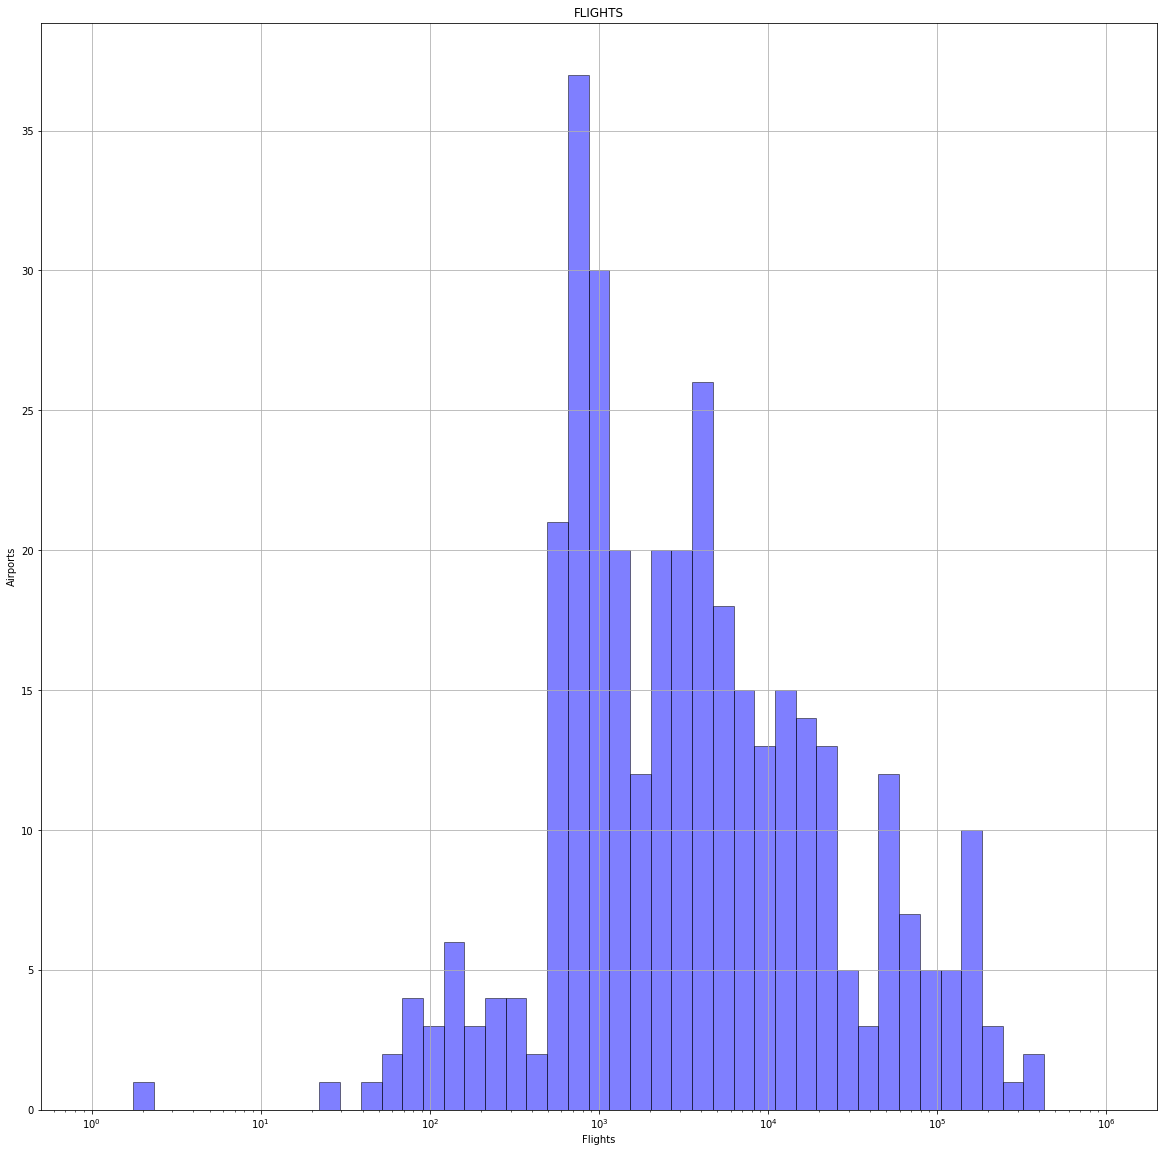

In [23]:
bins = np.logspace(0, 6, num=50)
bins = np.insert(bins, 0, 0)
all_flights.hist(bins = bins,
                 color='blue', edgecolor='black',
                 alpha=0.5, figsize=(20, 20))
plt.xlabel('Flights')
plt.ylabel('Airports')
plt.gca().set_xscale('log')
#End of question 3

# Question 4

* To begin with, to the Data Frame **a_flights**, I create a new column named MONTH that contains the month that the flights was made.

* I also create a new Data Frame **num_mont_tflights** that includes the number of total flights for each month.

* I also create a new Data Frame **num_mont_dflights** that includes the number of delayed flights for each month.

* Also in the above Data Frames I have add a column named DELAY that has the values *True* and *False*. In Data Frame **num_mont_tflights** this column is everywhere *False* and in Data Frame **num_mont_flights** this column is everywhere *True* because it includes the delayed flights for each month.

* I have created this columns because I need it to create the plot. 


In [24]:
#Start 4 Question
#all flights
#handling an unexpected error
pd.options.mode.chained_assignment = None
a_flights['MONTH'] = pd.DatetimeIndex(a_flights['FL_DATE']).month

#all flights
num_mont_tflights = a_flights['MONTH'].value_counts().rename_axis('MONTH').reset_index(name='FLIGHTS')
num_mont_tflights['DELAY'] = False

#delayed flights
a_flights = a_flights.loc[a_flights['DEP_DELAY'] > 0]

num_mont_dflights = a_flights['MONTH'].value_counts().rename_axis('MONTH').reset_index(name='FLIGHTS')
num_mont_dflights ['DELAY'] = True

* Based on the above two Data Frames I create a new one named **flights_per_month** that is the merger of the two. Includes duplicate months, if DELAY is *True* then this row includes the number of delayed flights for **x** MONTH and if DELAY is *False* then this row includes the number of total flights for **x** MONTH.

* Also in the Data Frame **flights_per_month** I convert the number that declare months to text.

In [25]:
flights_per_month = pd.concat([num_mont_tflights, num_mont_dflights])
flights_per_month = flights_per_month.reset_index(drop=True)
flights_per_month = flights_per_month.sort_values(by=['MONTH'])

import calendar
flights_per_month ['MONTH'] = flights_per_month ['MONTH'].apply(lambda x: calendar.month_abbr[x])

* Here I create the plot.

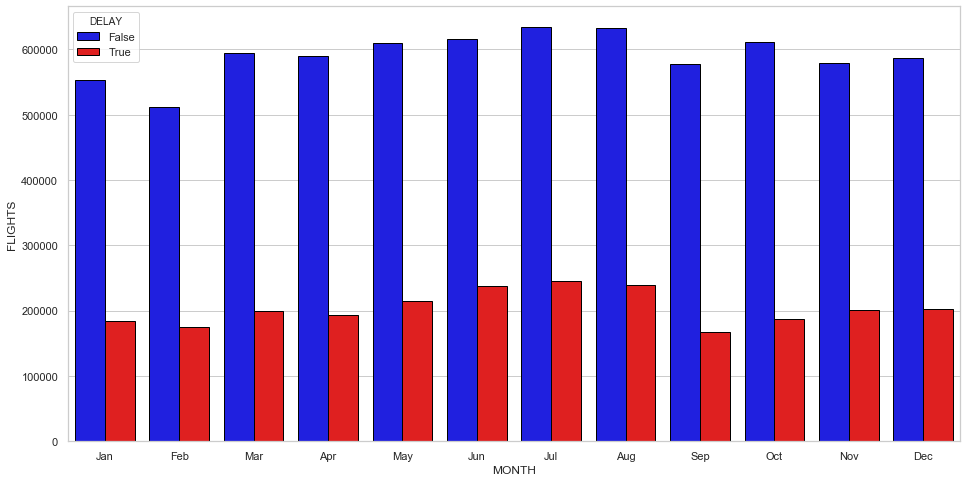

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x="MONTH", y="FLIGHTS", hue="DELAY", palette={True: '#ff0000', False: '#0000ff'},
                 edgecolor='black',
                 data=flights_per_month)
#End of Question 4

# Question 5

* I create a new Data Frame named **f_del_flights** with columns ORIGIN, DEST, CARRIER and DEP_DELAY.

* Based on this Data Frame I calculate the average delay for each combination of ORIGIN and DEST for each CARRIER and store it in a new variable named **grouped_b**.

In [27]:
#Start of Question 5
col_names = ['CARRIER', 'ORIGIN', 'DEST', 'DEP_DELAY']
f_del_flights = pd.DataFrame(index=all_del_flights.index, columns=col_names)
f_del_flights ['CARRIER'] = all_del_flights['CARRIER']
f_del_flights ['ORIGIN'] = all_del_flights['ORIGIN']
f_del_flights ['DEST'] = all_del_flights['DEST']
f_del_flights ['DEP_DELAY'] = all_del_flights['DEP_DELAY']

grouped_b = f_del_flights.groupby(['ORIGIN', 'DEST', 'CARRIER']).mean()

* I convert the Data Frame **grouped_b** to show for each possible ORIGIN and DEST, which CARRIER has the best performance, in terms of average DEP_DELAY.

In [28]:
grouped_b = grouped_b.loc[grouped_b.groupby(['ORIGIN', 'DEST'])['DEP_DELAY'].idxmin()]
grouped_b.reset_index('ORIGIN', inplace=True)
grouped_b.reset_index('DEST', inplace=True)
grouped_b.reset_index('CARRIER', inplace=True)
carriers.reset_index('Code', inplace=True)

In [29]:
grouped_b = grouped_b[['ORIGIN', 'DEST', 'CARRIER', 'DEP_DELAY']]
display(grouped_b)

,ORIGIN,DEST,CARRIER,DEP_DELAY
0,ABE,ATL,EV,40.976190
1,ABE,CLT,OH,35.364706
2,ABE,DTW,OO,72.098425
3,ABE,FLL,G4,55.574074
4,ABE,MDT,OO,175.000000
5,ABE,MYR,G4,52.541667
6,ABE,ORD,OO,52.954545
7,ABE,PGD,G4,54.163636
8,ABE,PHL,OH,59.500000
9,ABE,PIE,G4,48.271186


* I created a script which takes an ORIGIN and a DEST and shows which of the available CARRIERS presents the minimum average delay, based on the above Data Frame.

In [30]:
flag = True

org = ""
dest = ""

while(flag):
    org = input("Insert the Origin Airport ")
    dest = input("Insert the Destination Airport ")
    if ( len(grouped_b[(grouped_b.ORIGIN == org) & (grouped_b.DEST == dest)]) == 0):
        print("!!An error occured!!")
        print("You may added wrong Origin Airport or Destination Airport.")
        print("Or you may added an Origin Airport and Destination Airport with no Flights between them.")
        print("Please insert Origin Aiport and Destination Airport again!")
    else:
        flag = False
    
airline = grouped_b[(grouped_b.ORIGIN == org) & (grouped_b.DEST == dest)].CARRIER.item()
airline_fullname = carriers[(carriers.Code == airline)].Description.item()
print("The best airline with the best performance, in terms of mean departure delays, from " + org + " to " + dest + " is " + airline_fullname + " or " + airline + ".")

Insert the Origin Airport ATL
Insert the Destination Airport ABE
The best airline with the best performance, in terms of mean departure delays, from ATL to ABE is Endeavor Air Inc. or 9E.
